# Data

In [12]:
alphabet = 'абвгдеёжзийклмнопрстуфхцчшщьыъэюя'

with open('Voyna_i_mir.txt', encoding='cp1251') as f:
  data = f.read()

cleaned_data = ''

for char in data:
  if char.lower() in alphabet:
    cleaned_data += char.lower()

FREQS = {k: data.lower().count(k)/len(data) for k in alphabet}

# Visenere

**Visenere encryption**

In [13]:
alphabet = 'абвгдеёжзийклмнопрстуфхцчшщьыъэюя'

encryption_key = 'приветмир'
encrypted = ''

for i, char in enumerate(cleaned_data):
  encrypted += alphabet[(alphabet.find(char) + alphabet.find(encryption_key[i % len(encryption_key)])) % len(alphabet)]

print(cleaned_data)
print(encrypted)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



**Visinere decryption**

In [14]:
decrypted = ''

for i, char in enumerate(encrypted):
  decrypted += alphabet[(alphabet.find(char) - alphabet.find(encryption_key[i % len(encryption_key)])) % len(alphabet)]

print(decrypted)

томпервыйчастьперваяпоместьямойверныйрабнукнязьгенуяилуккапоместьяфамилиибонапартенетявамвпередговорюесливымненескажетечтоунасвойнаесливыещепозволитесебезащищатьвсегадостивсеужасыэтогоантихристаправояверючтоонантихристявасбольшенезнаювыужнедругмойвыужнемойверныйрабкаквыговоритефранцвдальнейшемпереводысфранцузскогонеоговариваютсяздесьидалеевсепереводыкромеспециальнооговоренныхпринадлежатлнтолстомуреднуздравствуйтездравствуйтеявижучтояваспугаюсадитесьирассказывайтетакговорилавиюлегодаизвестнаяаннапавловнашерерфрейлинаиприближеннаяимператрицымариифеодоровнывстречаяважногоичиновногокнязявасилияпервогоприехавшегонаеевечераннапавловнакашляланесколькоднейунеебылгриппкаконаговорилагриппбылтогдановоесловоупотреблявшеесятолькоредкимивзаписочкахразосланныхутромскраснымлакеембылонаписанобезразличиявовсехаилиеслиувасграфиликнязьнетввидуничеголучшегоиеслиперспективавечераубеднойбольнойнеслишкомваспугаеттоябудуоченьрадавидетьваснынчеусебямеждусемьюидесятьючасамианнашерергосподикакоегорячеенападениеот

# Funcs

In [15]:
from scipy.stats import chisquare

def calc_coincedence_rate(cipher_text):
  alphabet = 'абвгдеёжзийклмнопрстуфхцчшщьыъэюя'

  cipher_text = cipher_text.lower()

  return sum([cipher_text.count(char)*(cipher_text.count(char) - 1) for char in alphabet]) / (len(cipher_text) * (len(cipher_text) - 1))

def get_key_length(encrypted):
  cipher_text = encrypted
  test_result = 0
  possible_key_lengths = list()

  for i in range(2, 50):
    splits = list()
    if len(cipher_text) // i < 2:
      break

    for j in range(i):
      splits.append(cipher_text[j::i])

    prev = test_result
    test_result = sum([calc_coincedence_rate(split) for split in splits]) / len(splits)

    if test_result > prev and test_result > 0.055:
      possible_key_lengths.append(i)

  return possible_key_lengths


def shift_freqs(freqs_to_shift):
  alphabet = list(freqs_to_shift.keys())
  freqs_to_shift = list(freqs_to_shift.values())

  last_element = freqs_to_shift[-1]

  for i in range(len(freqs_to_shift)-1, 0, -1):
    freqs_to_shift[i] = freqs_to_shift[i-1]

  freqs_to_shift[0] = last_element

  return dict(zip(alphabet, freqs_to_shift))

def find_best_shift(split_freqs, freqs):
  shifted_freqs = split_freqs

  min_chi = None

  for i in range(len(alphabet)):
    shifted_freqs = shift_freqs(shifted_freqs)

    chi = chisquare(list(shifted_freqs.values()), list(freqs.values())).statistic
    
    if min_chi is None or chi < min_chi:
      min_chi = chi
      idx = i

  return min_chi, idx

def caeser_encode(text, alphabet, shift):
  encoded = ''

  for char in text:
    encoded += alphabet[(alphabet.find(char) + shift) % len(alphabet)]

  return encoded

def caeser_decode(text, alphabet, shift):
  decoded = ''

  for char in text:
    if char not in alphabet:
      decoded += char
    else:
      decoded += alphabet[(alphabet.find(char) - shift) % len(alphabet)]

  return decoded

In [16]:
def hack_cipher(text, freqs, alphabet='абвгдеёжзийклмнопрстуфхцчшщьыъэюя'):
  possible_key_lengths = get_key_length(text)

  splits = list()

  for i in range(possible_key_lengths[0]):
    splits.append(text[i::possible_key_lengths[0]])

  keys = list()
  splits_freqs = list()

  for split in splits:
    split_freqs = {k: split.lower().count(k)/len(split) for k in alphabet}

    splits_freqs.append(split_freqs)

  decoded = [0] * len(text)

  for i, split in enumerate(splits):
    split_freqs = {k: split.lower().count(k) / len(split) for k in alphabet}
    best_shift = find_best_shift(split_freqs, freqs)[1]

    decoded_split = caeser_decode(split, alphabet, 32-best_shift) # не знаю, зачем 32, скорее всего дело в том, как я смещаю алфавит, не хочу уже разбираться

    decoded[i::possible_key_lengths[0]] = list(decoded_split)

  return decoded

# Cipher hack

In [17]:
print(decrypted)
''.join(hack_cipher(encrypted, FREQS))

томпервыйчастьперваяпоместьямойверныйрабнукнязьгенуяилуккапоместьяфамилиибонапартенетявамвпередговорюесливымненескажетечтоунасвойнаесливыещепозволитесебезащищатьвсегадостивсеужасыэтогоантихристаправояверючтоонантихристявасбольшенезнаювыужнедругмойвыужнемойверныйрабкаквыговоритефранцвдальнейшемпереводысфранцузскогонеоговариваютсяздесьидалеевсепереводыкромеспециальнооговоренныхпринадлежатлнтолстомуреднуздравствуйтездравствуйтеявижучтояваспугаюсадитесьирассказывайтетакговорилавиюлегодаизвестнаяаннапавловнашерерфрейлинаиприближеннаяимператрицымариифеодоровнывстречаяважногоичиновногокнязявасилияпервогоприехавшегонаеевечераннапавловнакашляланесколькоднейунеебылгриппкаконаговорилагриппбылтогдановоесловоупотреблявшеесятолькоредкимивзаписочкахразосланныхутромскраснымлакеембылонаписанобезразличиявовсехаилиеслиувасграфиликнязьнетввидуничеголучшегоиеслиперспективавечераубеднойбольнойнеслишкомваспугаеттоябудуоченьрадавидетьваснынчеусебямеждусемьюидесятьючасамианнашерергосподикакоегорячеенападениеот

'томпервыйчастьперваяпоместьямойверныйрабнукнязьгенуяилуккапоместьяфамилиибонапартенетявамвпередговорюесливымненескажетечтоунасвойнаесливыещепозволитесебезащищатьвсегадостивсеужасыэтогоантихристаправояверючтоонантихристявасбольшенезнаювыужнедругмойвыужнемойверныйрабкаквыговоритефранцвдальнейшемпереводысфранцузскогонеоговариваютсяздесьидалеевсепереводыкромеспециальнооговоренныхпринадлежатлнтолстомуреднуздравствуйтездравствуйтеявижучтояваспугаюсадитесьирассказывайтетакговорилавиюлегодаизвестнаяаннапавловнашерерфрейлинаиприближеннаяимператрицымариифеодоровнывстречаяважногоичиновногокнязявасилияпервогоприехавшегонаеевечераннапавловнакашляланесколькоднейунеебылгриппкаконаговорилагриппбылтогдановоесловоупотреблявшеесятолькоредкимивзаписочкахразосланныхутромскраснымлакеембылонаписанобезразличиявовсехаилиеслиувасграфиликнязьнетввидуничеголучшегоиеслиперспективавечераубеднойбольнойнеслишкомваспугаеттоябудуоченьрадавидетьваснынчеусебямеждусемьюидесятьючасамианнашерергосподикакоегорячеенападениео

In [18]:
cleaned_data = 'шифрвиженераметодполиалфавитногошифрованиябуквенноготекстасиспо\
льзованиемключевогословаэтотметодявляетсяпростойформоймногоалфавитнойзаменышифр\
виженераизобреталсямногократновпервыеэтотметодописалджованибаттистабелласооднак\
оввекеполучилимяблезавиженерафранцузскогодипломатаметодпростдляпониманияиреализ\
ацииноявляетсянедоступнымдляпростыхметодовкриптоанализахотяшифрлегкопонятьиреал\
изоватьнапротяжениитрехстолетийонпротивостоялвсемпопыткамегосломатьчемизаработа\
лимяфрнеразгаданныйшифрмногиелюдипыталисьреализоватьсхемышифрованиякоторыепосут\
иявлялисьшифрамивиженера'

encryption_key = 'николай'
encrypted = ''

for i, char in enumerate(cleaned_data):
  encrypted += alphabet[(alphabet.find(char) + alphabet.find(encryption_key[i % len(encryption_key)])) % len(alphabet)]

print(cleaned_data)
print(encrypted)
print(''.join(hack_cipher(encrypted, FREQS)))

шифрвиженераметодполиалфавитногошифрованиябуквенноготекстасиспользованиемключевогословаэтотметодявляетсяпростойформоймногоалфавитнойзаменышифрвиженераизобреталсямногократновпервыеэтотметодописалджованибаттистабелласооднаковвекеполучилимяблезавиженерафранцузскогодипломатаметодпростдляпониманияиреализацииноявляетсянедоступнымдляпростыхметодовкриптоанализахотяшифрлегкопонятьиреализоватьнапротяжениитрехстолетийонпротивостоялвсемпопыткамегосломатьчемизаработалимяфрнеразгаданныйшифрмногиелюдипыталисьреализоватьсхемышифрованиякоторыепосутиявлялисьшифрамивиженера
ёсяяниртцпялмоачоюьлтнфяониъычнэдиюючмощииоъхррнчълщбркыаиъчэпшщгтэначцнчщчюбткщсьсхъкклюоъьнээпялщзпбэящючъбьйюъщчэхмчълщочфйпсэъьйснхпъжштвщмчтечтщкчуокюнэочсиьцщськьнышэнпоюкёуитшахпбьдшэсъочдръккъфбйаыуаюактфцоэошсцкщьвлтупюьлэесцчшякщнтониртцпялфьнцбвусфълщтфпхъхкблмоачоюъоыамцныочцхкъфятюнкьфзйдсуъьялщзпбэячтмщаюущыдчтчящючъбжхцтыщтьвфюсьбьачнфуцлхшазгчархтлхэыочмыечъейщстэнаъзцкюъоъмппъфиъюнааюохтыушьнщючэчноыачйьнсоьшщюжтфнхпс

# Experiments

**Friedman Test**

In [19]:
possible_key_lengths = get_key_length(encrypted)

<BarContainer object of 32 artists>

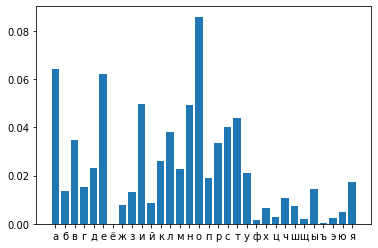

In [20]:
import matplotlib.pyplot as plt

alphabet = 'абвгдеёжзийклмнопрстуфхцчшщбыъэюя'

with open('Voyna_i_mir.txt', encoding='cp1251') as f:
  data = f.read()

freqs = {k: data.lower().count(k)/len(data) for k in alphabet}

plt.bar(freqs.keys(), freqs.values())

In [21]:
splits = list()

for i in range(possible_key_lengths[0]):
  splits.append(encrypted[i::possible_key_lengths[0]])

keys = list()
splits_freqs = list()

for split in splits:
  split_freqs = {k: split.lower().count(k)/len(split) for k in alphabet}

  splits_freqs.append(split_freqs)

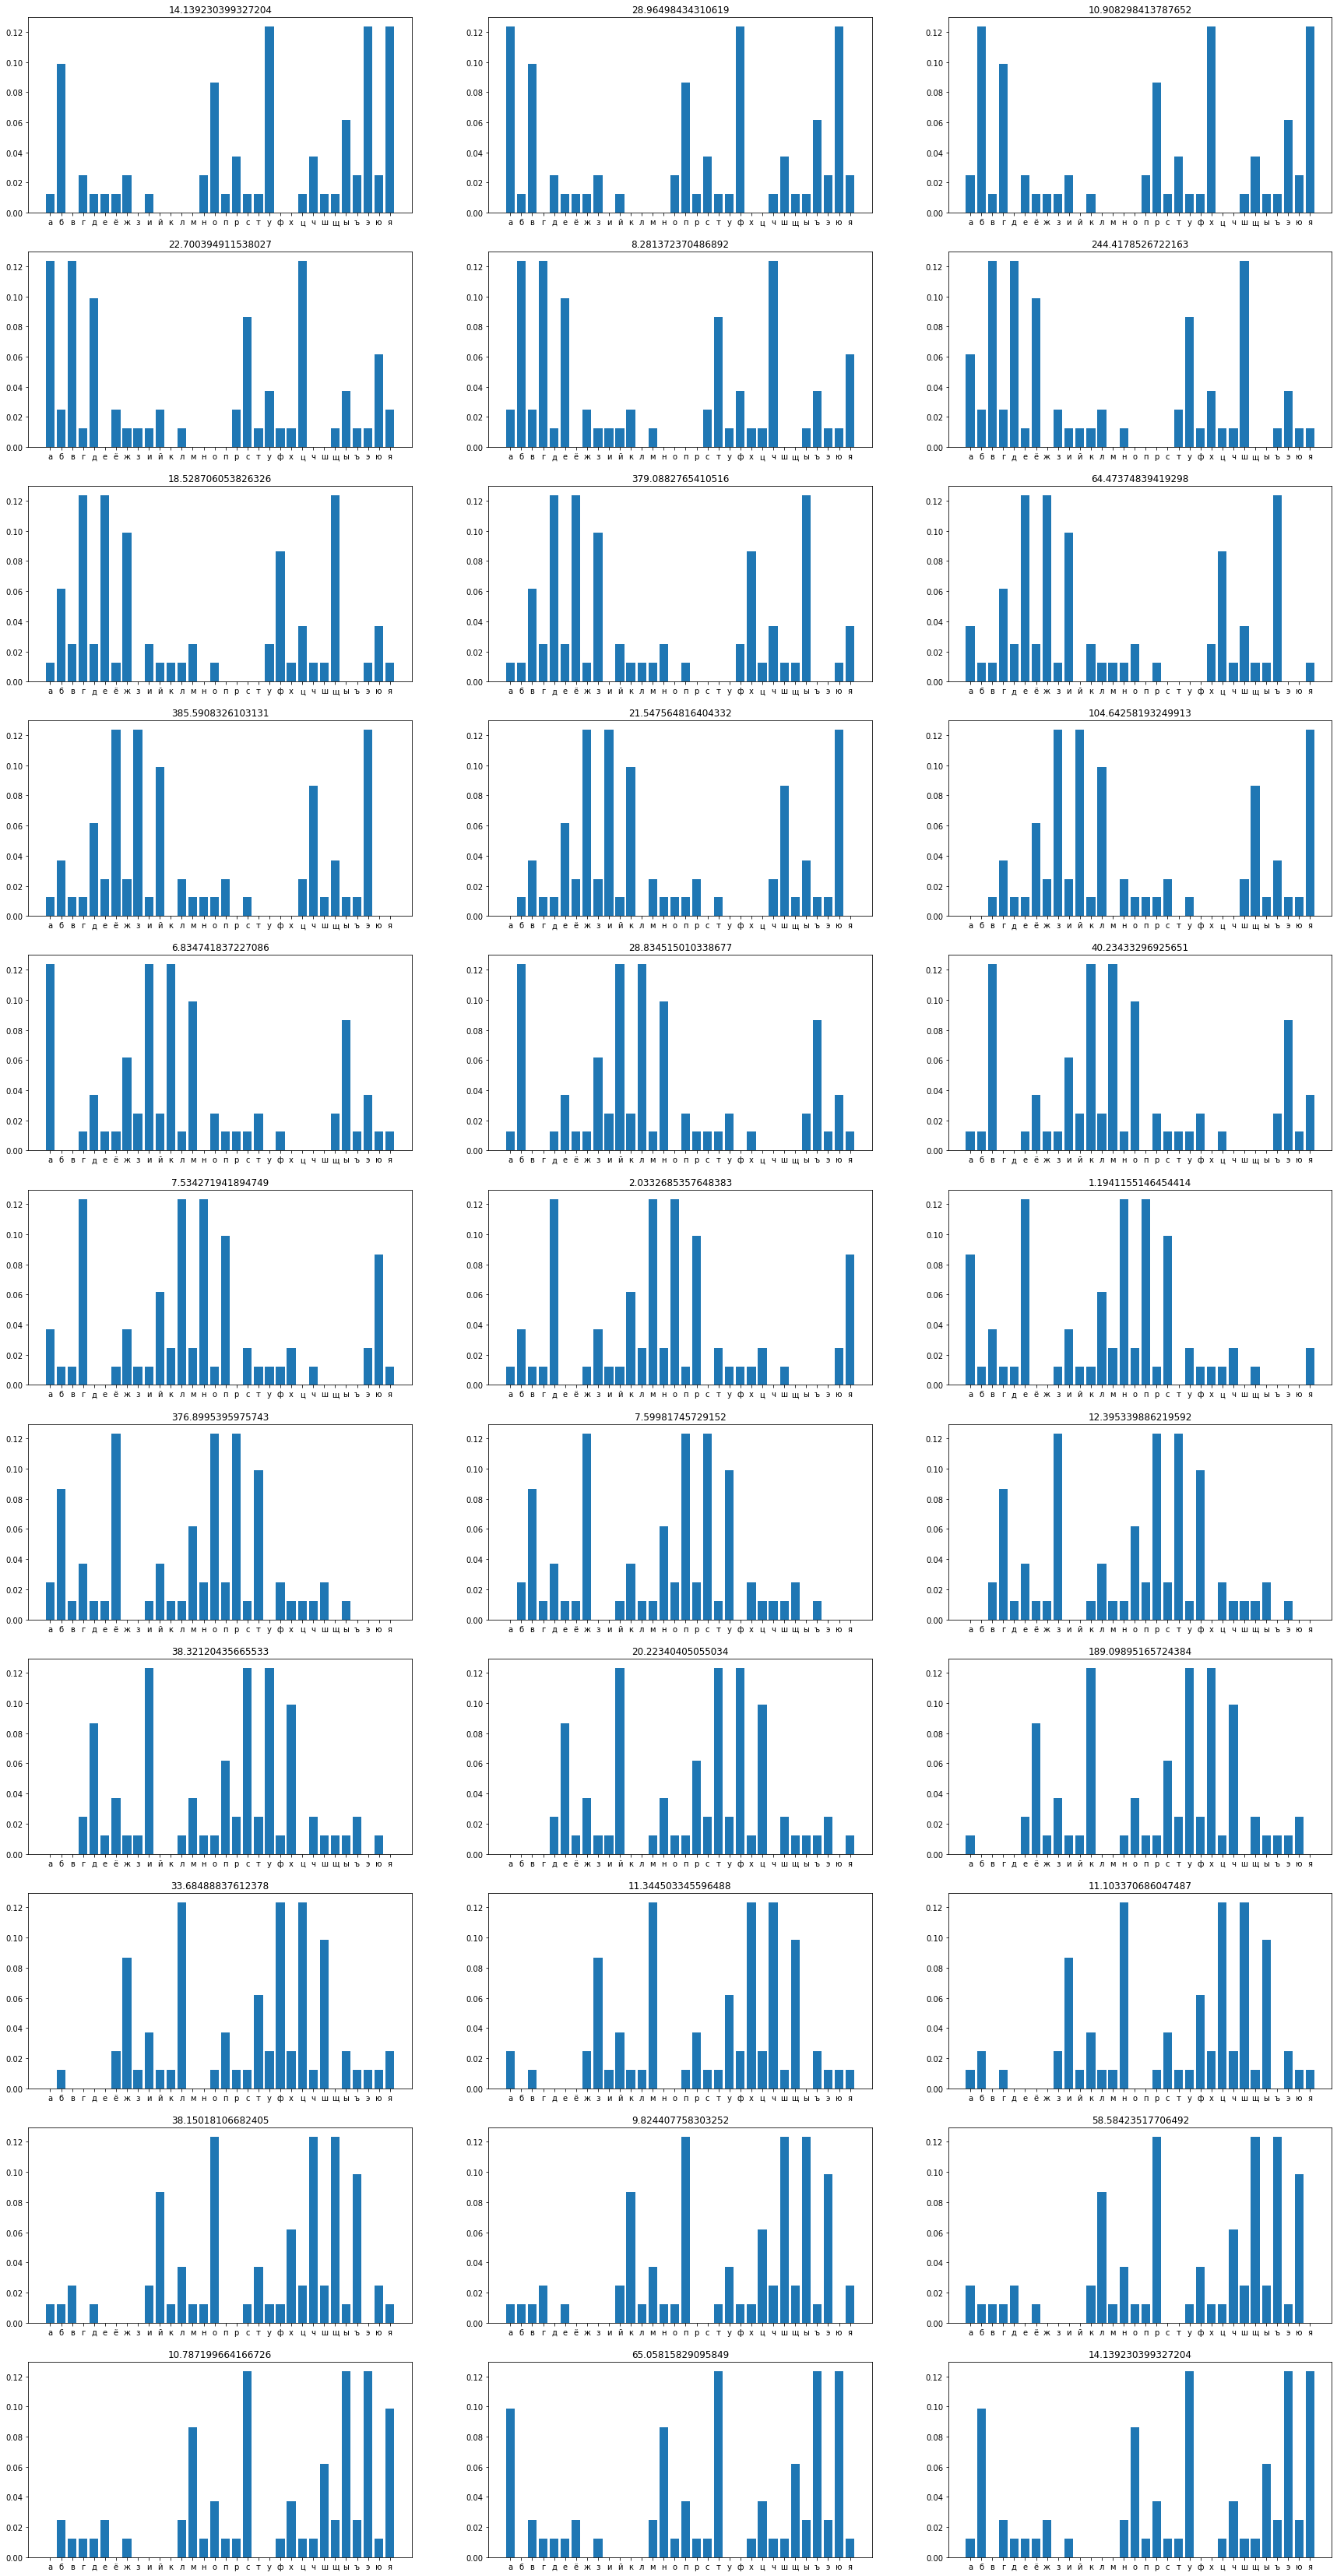

In [22]:
fig, axes = plt.subplots(ncols=3, nrows=11, figsize=(30, 60))

shifted_freqs = splits_freqs[0]

for i in range(len(alphabet)):
  shifted_freqs = shift_freqs(shifted_freqs)
  axes[i // 3, i % 3].bar(list(shifted_freqs.keys()), list(shifted_freqs.values()))
  axes[i // 3, i % 3].set_title(chisquare(list(shifted_freqs.values()), list(freqs.values())).statistic)

65.05815829095849
8.550978665907486
34.70182033401884
23.305698521441855
35.24516989185512
1.1664596955400013
16.036122541862134


IndexError: ignored

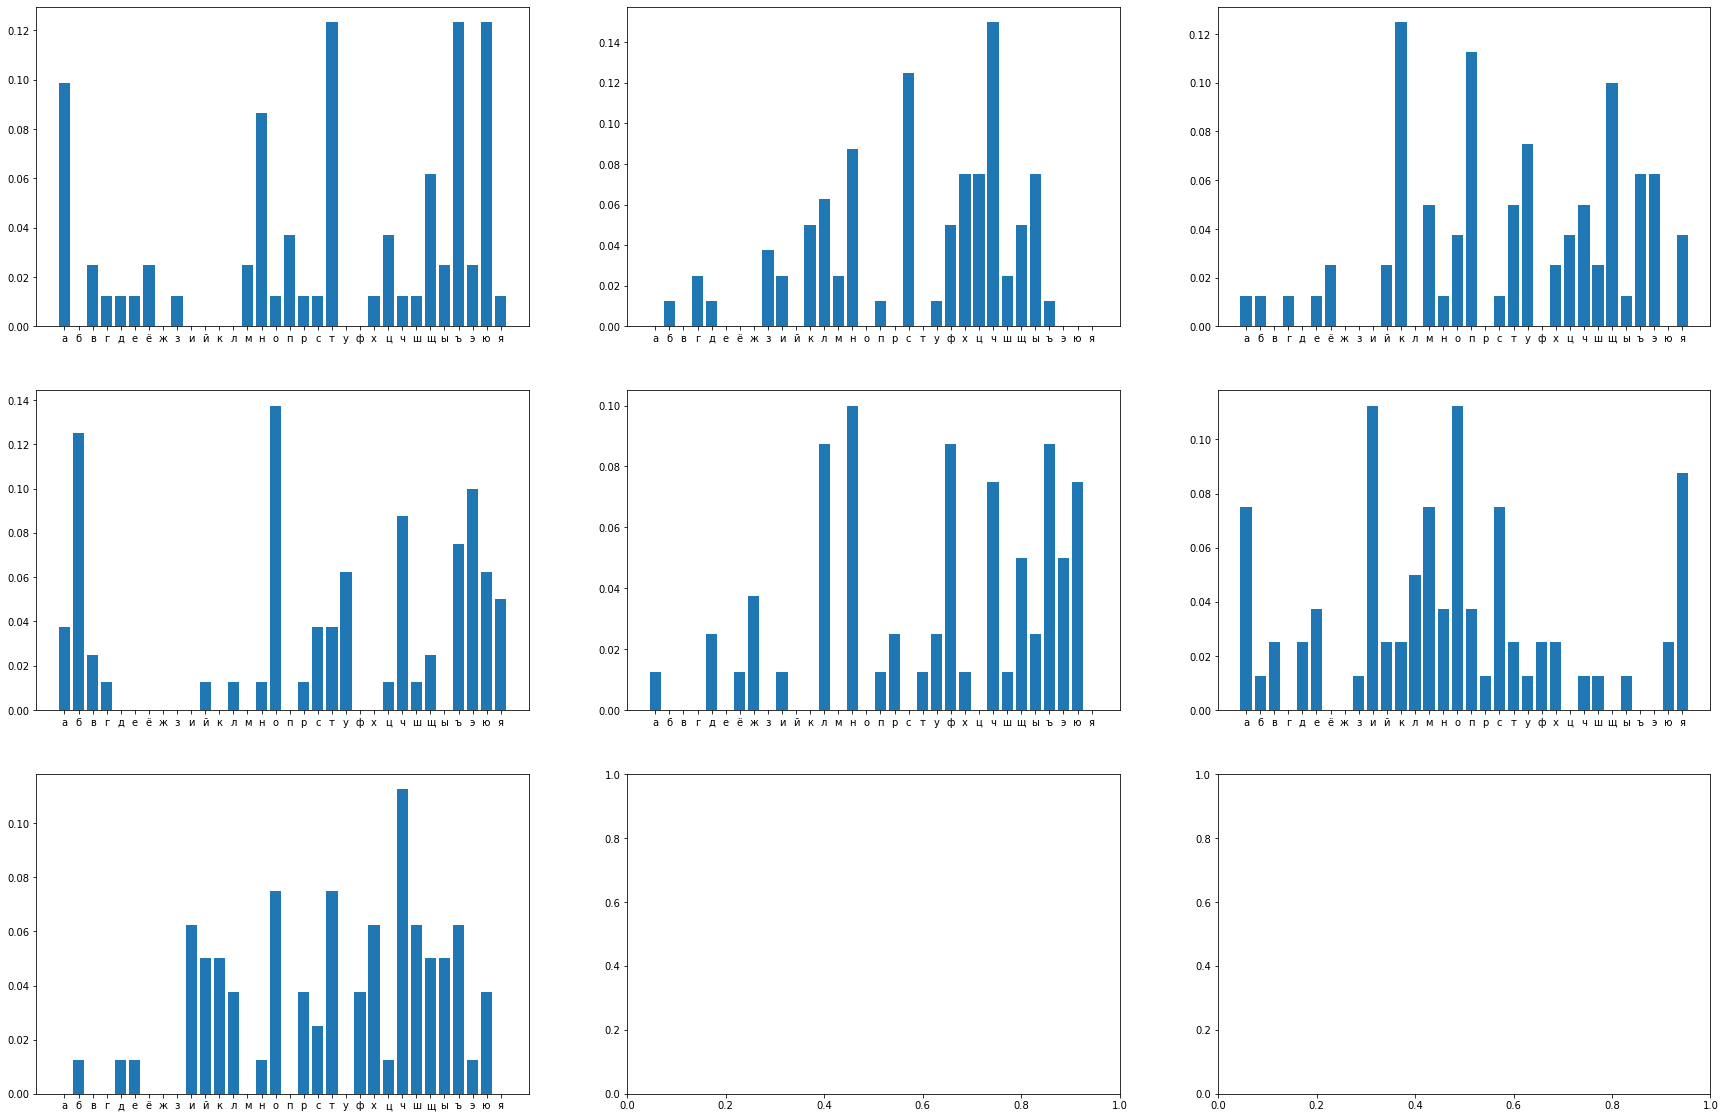

In [23]:
from scipy.stats import chisquare

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(30, 20))

for i in range(9):
  axes[i // 3, i % 3].bar(splits_freqs[i].keys(), splits_freqs[i].values())
  print(chisquare(list(splits_freqs[i].values()), list(freqs.values())).statistic)